### Import & Load Data

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
ploan= pd.read_csv("Bank_Personal_Loan_Modelling.csv")

### Review Data

In [3]:
ploan.shape

(5000, 14)

In [4]:
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
ploan= ploan.drop('ID', axis=1)
ploan.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
ploan.isnull().values.any()

False

In [8]:
ploan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### Exploratory Data Analysis

In [9]:
ploan.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [10]:
# Number of people with zero mortgage?
m_true= len(ploan.loc[ploan['Mortgage'] > 0])
m_false= len(ploan.loc[ploan['Mortgage'] == 0])
print("Number of ppl with a Mortgage: {0} ({1:2.2f}%)".format(m_true, (m_true / (m_true + m_false)) * 100 ))
print("Number of ppl with zero Mortgae: {0} ({1:2.2f}%)".format(m_false, (m_false / (m_true + m_false)) * 100))

Number of ppl with a Mortgage: 1538 (30.76%)
Number of ppl with zero Mortgae: 3462 (69.24%)


In [11]:
# Number of people with zero credit card spending/month
cc_true= len(ploan.loc[ploan['CCAvg'] > 0])
cc_false= len(ploan.loc[ploan['CCAvg'] == 0])
print("Number of ppl with Credit Card debt: {0} ({1:2.2f}%)".format(cc_true, (cc_true / (cc_true + cc_false)) * 100 ))
print("Number of ppl with zero Credit Card spending: {0} ({1:2.2f}%)".format(cc_false, (cc_false / (cc_true + cc_false)) * 100))

Number of ppl with Credit Card debt: 4894 (97.88%)
Number of ppl with zero Credit Card spending: 106 (2.12%)


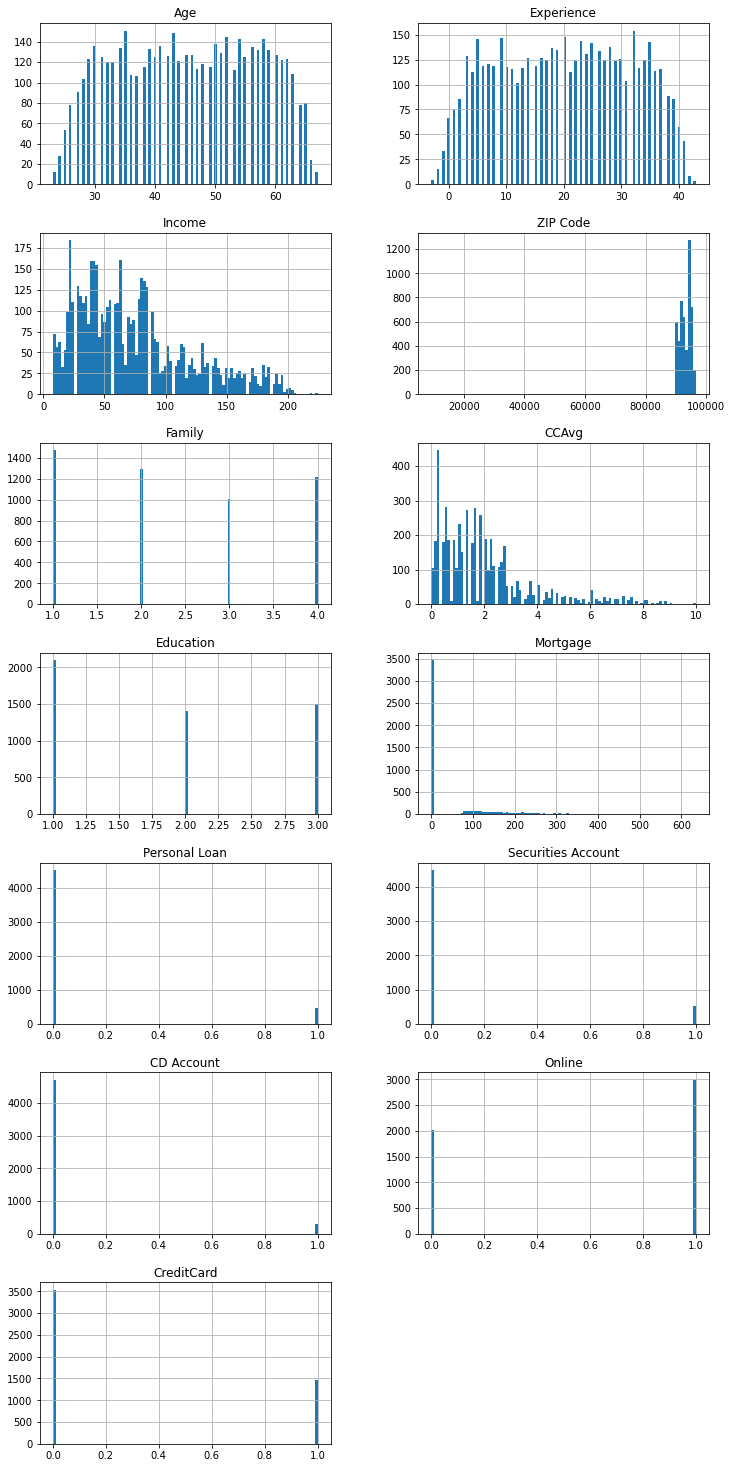

In [12]:
columns= list(ploan)
ploan[columns].hist(stacked=False, bins=100, figsize=(12, 30), layout=(8,2));

In [13]:
# Show correlation matrix
ploan.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [14]:
def plot_corr(df, size=12):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (x, y), z in np.ndenumerate(corr):
        ax.text(x, y, '{:0.1f}'.format(z), ha='center', va='center')

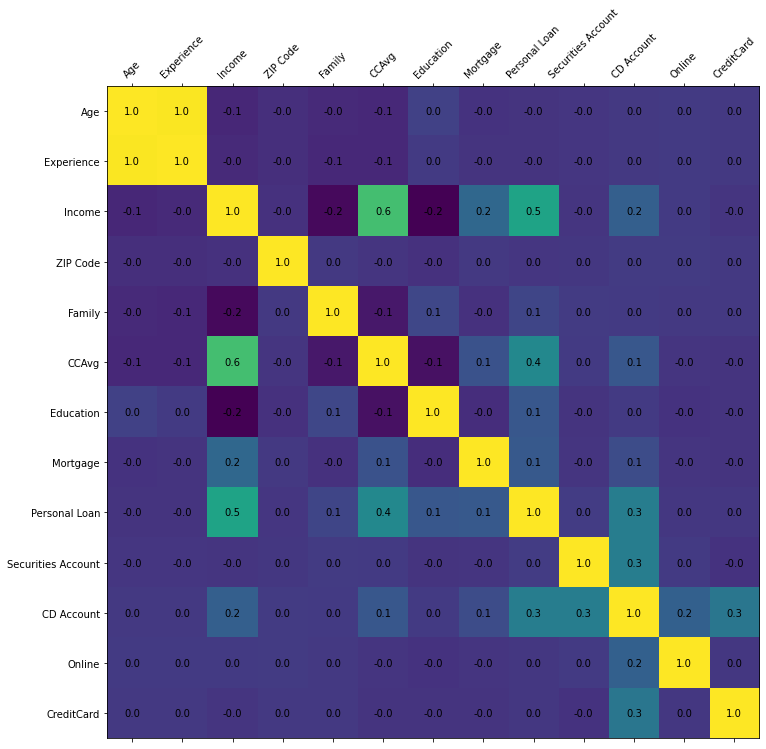

In [15]:
plot_corr(ploan)

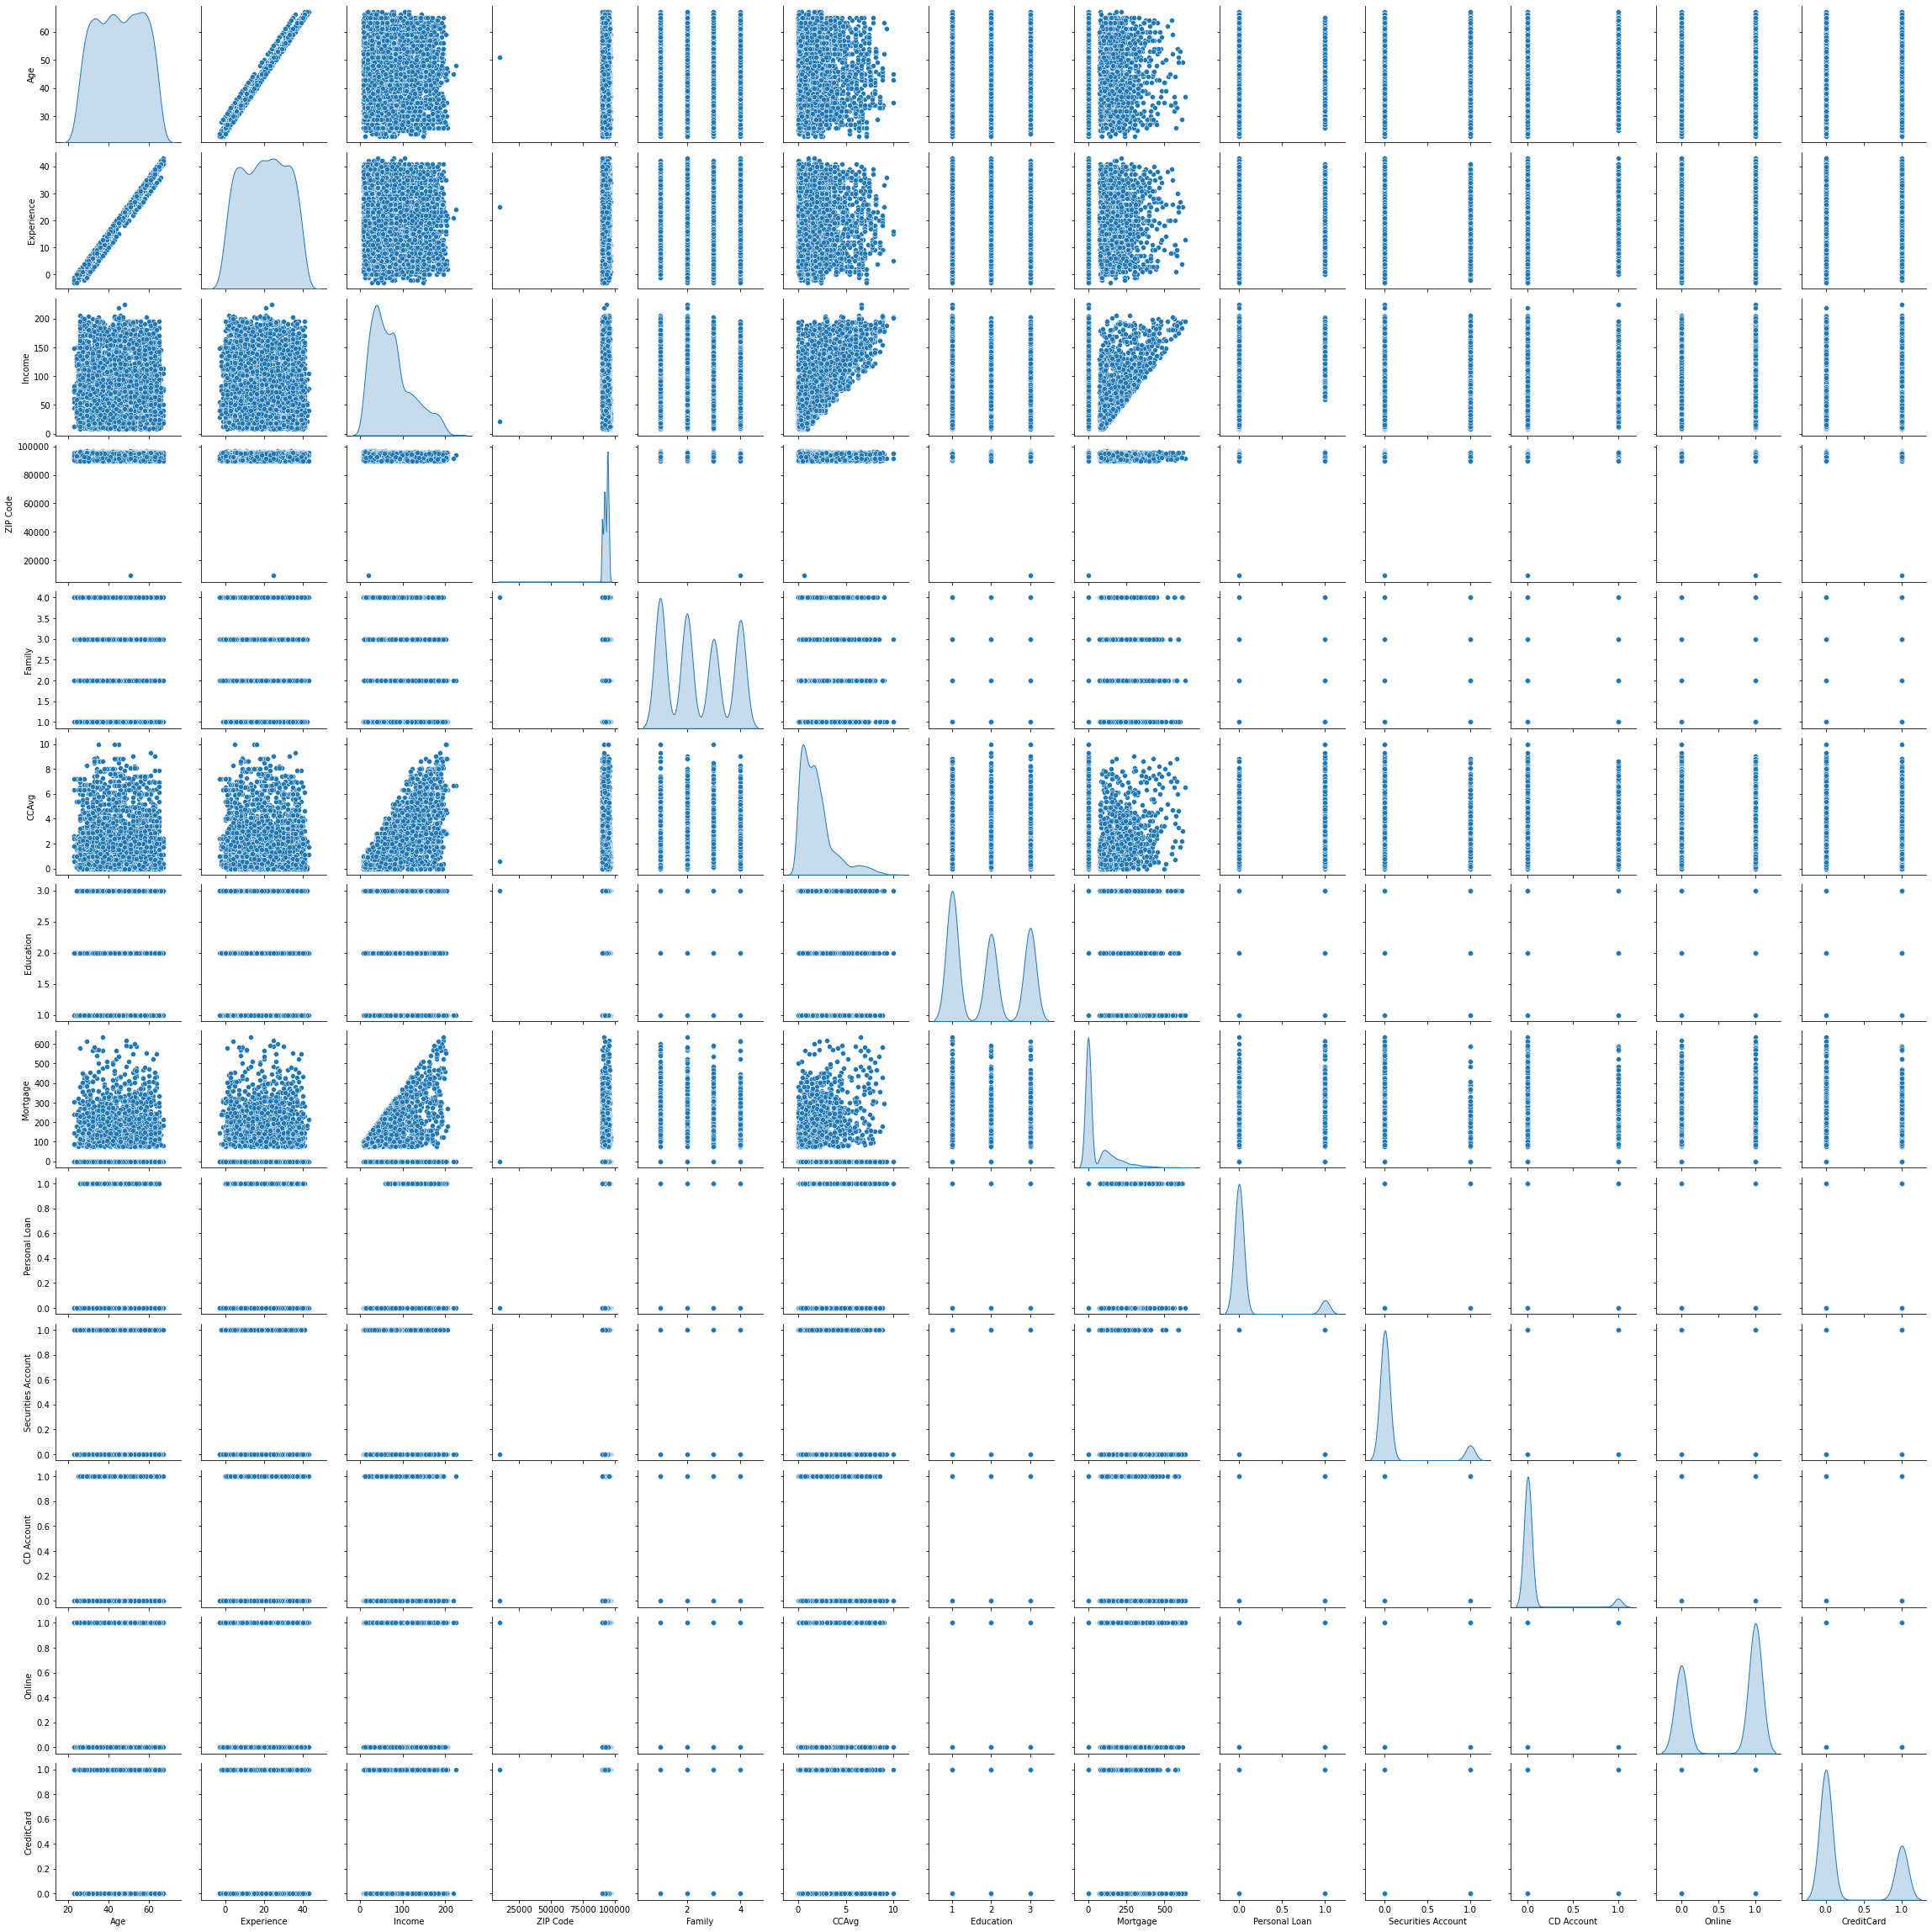

In [16]:
sns.pairplot(ploan, diag_kind='kde')

<AxesSubplot:>

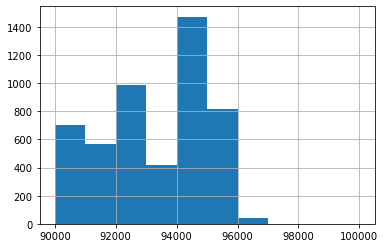

In [17]:
ploan['ZIP Code'].hist(stacked=False, bins=10, range= (90000,100000))

<AxesSubplot:>

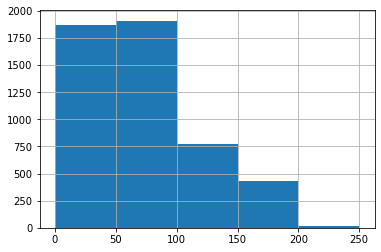

In [18]:
ploan['Income'].hist(stacked=False, bins=5, range= (0,250))

In [19]:
# Define 'Income' by bins
ploan['Income'] = np.where(ploan['Income'].between(0,50), 5, ploan['Income'])
ploan['Income'] = np.where(ploan['Income'].between(50,100), 4, ploan['Income'])
ploan['Income'] = np.where(ploan['Income'].between(100,150), 3, ploan['Income'])
ploan['Income'] = np.where(ploan['Income'].between(150,200), 2, ploan['Income'])
ploan['Income'] = np.where(ploan['Income'].between(200,250), 1, ploan['Income'])
ploan.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,5,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,5,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,5,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,4,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,5,91330,4,1.0,2,0,0,0,0,0,1


In [20]:
# Define 'ZIP Code' by bins
ploan['ZIP Code'] = np.where(ploan['ZIP Code'].between(90000,91000), 1, ploan['ZIP Code'])
ploan['ZIP Code'] = np.where(ploan['ZIP Code'].between(91000, 92000), 2, ploan['ZIP Code'])
ploan['ZIP Code'] = np.where(ploan['ZIP Code'].between(92000, 93000), 3, ploan['ZIP Code'])
ploan['ZIP Code'] = np.where(ploan['ZIP Code'].between(93000, 94000), 4, ploan['ZIP Code'])
ploan['ZIP Code'] = np.where(ploan['ZIP Code'].between(94000, 95000), 5, ploan['ZIP Code'])
ploan['ZIP Code'] = np.where(ploan['ZIP Code'].between(95000, 96000), 6, ploan['ZIP Code'])
ploan['ZIP Code'] = np.where(ploan['ZIP Code'].between(96000, 97000), 7, ploan['ZIP Code'])
ploan.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,5,2,4,1.6,1,0,0,1,0,0,0
1,45,19,5,1,3,1.5,1,0,0,1,0,0,0
2,39,15,5,5,1,1.0,1,0,0,0,0,0,0
3,35,9,4,5,1,2.7,2,0,0,0,0,0,0
4,35,8,5,2,4,1.0,2,0,0,0,0,0,1


In [21]:
# Define 'Mortgage' as Y/N
ploan['Mortgage']= ploan['Mortgage'].mask(ploan['Mortgage'] > 0, 1)
ploan[ploan['Mortgage']== 1]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
5,37,13,5,3,4,0.4,2,1,0,0,0,1,0
8,35,10,4,1,3,0.6,2,1,0,0,0,1,0
16,38,14,3,6,4,4.7,3,1,1,0,0,0,0
20,56,31,5,5,4,0.9,2,1,0,0,0,1,0
22,29,5,4,1,1,1.2,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,48,23,5,4,3,1.7,2,1,0,0,0,1,0
4988,34,8,4,6,1,2.5,1,1,0,0,0,0,1
4990,55,25,4,6,4,2.0,3,1,0,0,0,0,1
4991,51,25,4,2,1,1.9,2,1,0,0,0,0,1


In [22]:
# Convert X & Y variables to categorical dtypes
ploan['Income']= ploan['Income'].astype('category')
ploan['ZIP Code']= ploan['ZIP Code'].astype('category')
ploan['Family']= ploan['Family'].astype('category')
ploan['Education']= ploan['Education'].astype('category')
ploan['Mortgage']= ploan['Mortgage'].astype('category')
ploan['Personal Loan']= ploan['Personal Loan'].astype('category')
ploan['Securities Account']= ploan['Securities Account'].astype('category')
ploan['CD Account']= ploan['CD Account'].astype('category')
ploan['Online']= ploan['Online'].astype('category')
ploan['CreditCard']= ploan['CreditCard'].astype('category')

In [23]:
# Value counts of all categorical columns
for x in list(ploan.columns[ploan.dtypes=='category']):
    print(ploan[x].value_counts(normalize=True))
    print()

5    0.3828
4    0.3748
3    0.1540
2    0.0852
1    0.0032
Name: Income, dtype: float64

5       0.2944
3       0.1976
6       0.1630
1       0.1406
2       0.1130
4       0.0832
7       0.0080
9307    0.0002
Name: ZIP Code, dtype: float64

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0    0.6924
1    0.3076
Name: Mortgage, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



In [49]:
ploan.drop(ploan.index[384], inplace=True)
ploan[380:390]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
380,63,33,5,5,1,1.5,3,0,0,0,0,1,1
381,55,29,4,6,2,2.3,3,0,0,0,0,1,1
382,65,41,3,5,4,2.0,1,0,1,0,0,0,1
383,44,18,4,5,1,0.2,1,0,0,0,0,1,0
385,35,9,5,4,3,0.9,1,0,0,0,0,1,0
386,30,5,5,6,4,1.7,2,0,0,0,0,1,0
387,31,5,4,6,4,1.8,2,0,0,0,0,1,0
388,54,30,4,6,4,3.4,3,0,1,0,0,0,0
389,45,20,2,1,1,7.0,1,0,0,0,0,1,1
390,45,19,5,3,1,0.2,1,0,0,0,0,1,0


### Prepare Input Data for the model

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [90]:
# Seperate majority and minority classes for imbalance
Y_majority= ploan[ploan['Personal Loan']==0]
Y_minority= ploan[ploan['Personal Loan']==1]

In [91]:
# Upsample minority class
Y_minority_upsampled= resample(Y_minority, replace=True, n_samples=2000, random_state=333)

# Combine majority with upsampled minority class
Y= pd.concat([Y_majority, Y_minority_upsampled])

Y['Personal Loan'].value_counts()

y= Y['Personal Loan']
x= Y.drop(columns=['Age', 'Experience', 'CCAvg', 'Personal Loan', 'Securities Account', 'CD Account'])

In [92]:
# Split data into to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=333)

In [93]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(ploan.loc[ploan['Personal Loan'] == 1]), (len(ploan.loc[ploan['Personal Loan'] == 1])/len(ploan.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(ploan.loc[ploan['Personal Loan'] == 0]), (len(ploan.loc[ploan['Personal Loan'] == 0])/len(ploan.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4519 (90.40%)

Training Personal Loan True Values    : 1399 (30.66%)
Training Personal Loan False Values   : 3164 (69.34%)

Test Personal Loan True Values        : 601 (30.73%)
Test Personal Loan False Values       : 1355 (69.27%)



### Fit Logistic Regression Model

In [94]:
model= LogisticRegression(random_state=333, fit_intercept=False)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [97]:
# Function to get confusion matrix in a proper format
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

def draw_cm( actual, predicted ):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8735481043173351

Testing accuracy 0.8578732106339468

Confusion Matrix


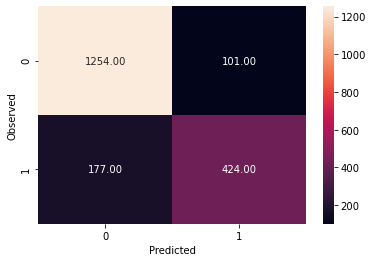

None

Recall: 0.7054908485856906

Precision: 0.8076190476190476

F1 Score: 0.7531083481349912

Roc Auc Score: 0.8154760515991183


In [100]:
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_pred))
print()
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))

In [101]:
## Find Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
0,Income,2.05
3,Education,1.45
2,Family,0.74
5,Online,0.47
4,Mortgage,0.31
6,CreditCard,0.24
1,ZIP Code,0.20


In [103]:
#For test data show all rows where the predicted class is not equal to the observed class.

z = x_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_pred
z[z['Predicted Loan Status'] != z['Observed Loan Status']]

,Income,ZIP Code,Family,Education,Mortgage,Online,CreditCard,Observed Loan Status,Predicted Loan Status
3661,3,5,1,2,0,0,1,1,0
2027,2,5,2,1,1,0,0,0,1
2159,4,5,1,3,1,0,1,1,0
3651,3,1,1,3,0,0,1,1,0
3376,2,6,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1129,4,5,3,1,0,1,1,1,0
2320,4,3,4,3,0,1,0,0,1
671,3,3,1,2,1,1,0,1,0
1913,3,3,4,1,1,1,0,1,0


###  Business Insights

##### Confusion matrix means
True Positive (observed=1,predicted=1):

Customers who will actually take a personal loan and the model predicted they will

False Positive (observed=0,predicted=1):

Customers who will not take a personal loan but the model predicted they will 

True Negative (observed=0,predicted=0):

Customers who will not take a personal loan and the model predicted they will not

False Negative (observed=1,predicted=0):

Customers who will actually take a personal loan but the model predicted they will not 

##### Important Features
'Income', 'Education', and 'Family' appear to be the top features which are influencing the models output based on their coefficient values

##### Important Measure of Model Performance

In the above scenario, the retail marketing department wants to increase the conversion rate of customers accepting personal loans with a minimal marketing budget. Therefore we want our model to **minimize the number of False Negatives**, if FN is high then we are missing out on customers who would accept a personal loan but we did not target them with our marketing, resulting in missed revenue. Hence **Recall is the important measure we want to optimize in our model**.

In the case of a False Positive, our opportunity cost is low such that, we are okay with spending a few dollars per customer even if they don't end up taking a loan. The potential revenue the bank can generate from interest over the life of a loan is much higher than the opportunity cost associated with marketing to customers.

In [113]:
!jupyter nbconvert --to html Project_PLCampaignModel_HarshaDasaraju.ipynb

[NbConvertApp] Converting notebook Project_PLCampaignModel_HarshaDasaraju.ipynb to html
[NbConvertApp] Writing 2011087 bytes to Project_PLCampaignModel_HarshaDasaraju.html
